In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import re
from scipy.integrate import cumulative_trapezoid

# 1x3 scatter plots of RF regression results

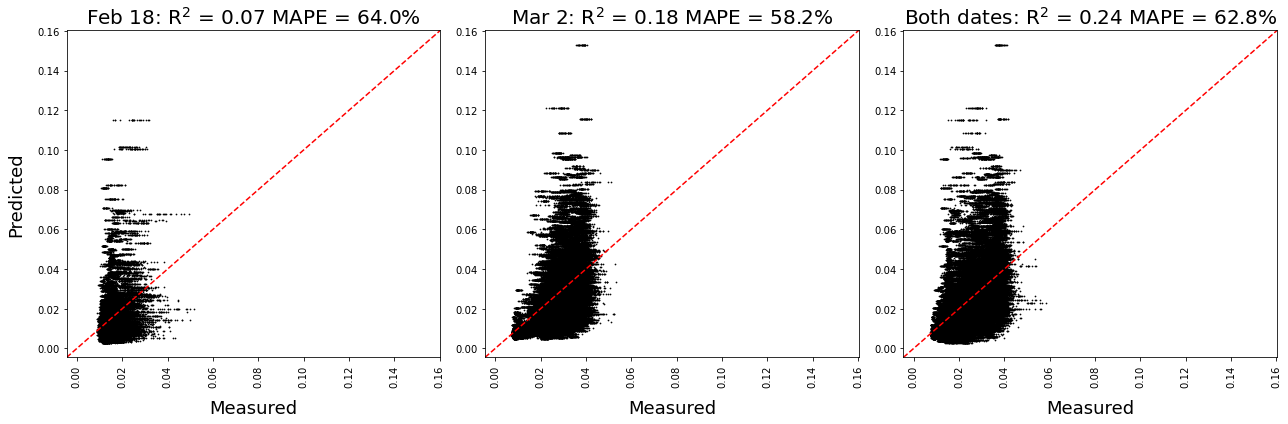

In [3]:
s1_unit = 'dB'
second_stat = 'mean'

metrics_dir = 'output/rf_metrics/single_date'
predict_dir = 'output/rf_predictions/single_date'
metrics_multi_dir = 'output/rf_metrics/multi_date'
predict_multi_dir = 'output/rf_predictions/multi_date'

metrics_0219 = sorted(glob(f'{metrics_dir}/0219/*{s1_unit}*.csv'))
predict_0219 = sorted(glob(f'{predict_dir}/0219/*{s1_unit}*.csv'))
metrics_0302 = sorted(glob(f'{metrics_dir}/0302/*{s1_unit}*csv'))
predict_0302 = sorted(glob(f'{predict_dir}/0302/*{s1_unit}*.csv'))
metrics_multi = sorted(glob(f'{metrics_multi_dir}/*{s1_unit}*.csv'))
predict_multi = sorted(glob(f'{predict_multi_dir}/*{s1_unit}*.csv'))


for i in range(len(metrics_0219)):
    # if '_10m_' in metrics_0219[i]:
    #     continue
    # Check to ensure file names line up
    target = metrics_0219[i].split('.')[0].split('/')[-1]
    if '0219' in target: 
        target = target.split('0219_')[-1]
    found_0302 = bool(re.findall(target, metrics_0302[i]))
    found_multi = bool(re.findall(target, metrics_multi[i]))
    if not (found_0302 & found_multi):
        print('Filenames not aligned!!')
        break
    # Continue after check
    files_0219 = (metrics_0219[i], predict_0219[i])
    files_0302 = (metrics_0302[i], predict_0302[i])
    files_multi = (metrics_multi[i], predict_multi[i])
    title_prefix = ['Feb 18: ', 'Mar 2: ', 'Both dates: ']
    fig, ax = plt.subplots(1, 3, figsize=(18,6))
    
    j = 0
    for date in [files_0219, files_0302, files_multi]:
        mf = date[0]
        pf = date[1]
        # Set up dataframes
        metrics_df = pd.read_csv(mf, index_col=0)
        metrics_df.index.name = 'run_no'
        predict_df = pd.read_csv(pf, index_col=0)
        predict_df['run_no'] = predict_df['run_no'].astype(int)
        predict_df.index.name = 'sample'
        predict_df.index = predict_df.index % len(predict_df)//100 # reset sample count for each run
        predict_df.index = pd.MultiIndex.from_arrays([predict_df['run_no'], predict_df.index])
        predict_df.drop(columns='run_no', inplace=True)

        # Loop through runs for scatter plot
        
        ax[j].scatter(predict_df['predict'], predict_df['valid'], s=2, marker='.', color='k')
        ax[j].set_xlim(ax[j].get_ylim())
        # ax[j].set_xticks(ax[j].get_yticks())
        ax[j].tick_params(axis='x', labelrotation=90)
        # ax[j].set_xlim(ax[j].get_ylim())
        
        ax[j].set_title(f'{title_prefix[j]}R$^2$ = {str(round(metrics_df["r2"].mean(), 2))} MAPE = {str(round(metrics_df["mape"].mean(), 1))}%', fontsize=20)

        if j == 0:
            ax[j].set_ylabel('Predicted', fontsize=18, labelpad=12)

        ax[j].set_xlabel('Measured', fontsize=18, labelpad=12)
        # check for specified scale in filename
        # if not re.findall(r'_\d{1,2}[a-z]{1,2}_', mf):
        #     # Scale not specified (10m pixels)
        #     fig.suptitle('RF target: 10 m ' + mf.split('_dB_')[-1][:-4], fontsize=22)
        # else:
        #     fig.suptitle('RF target: ' + mf.split('_dB_')[-1][:-4], fontsize=22)



        j += 1

        # hbin = ax[1].hexbin(predict_df['predict'], predict_df['valid'], cmap='viridis',
        #                     gridsize=50,
        #                     extent=(ax[0].get_xlim()[0], ax[0].get_xlim()[1], ax[0].get_ylim()[0], ax[0].get_ylim()[1]))
        # cbar = plt.colorbar(hbin, ax=ax[1])
        # ax[1].set_xlim(ax[0].get_xlim())
        # ax[1].set_ylim(ax[0].get_ylim())

    xmin, xmax = ax[0].get_xlim()
    ymin, ymax = ax[0].get_ylim()
    for axx in (ax[1], ax[2]):
        x0, x1 = axx.get_xlim()
        if x0 < xmin:
            xmin = x0
        if x1 > xmax:
            xmax = x1
        y0, y1 = axx.get_ylim()
        if y0 < ymin:
            ymin = y0
        if y1 > ymax:
            ymax = y1
    
    
    # ax[0].set_ylabel('Predicted', fontsize=18, labelpad=12)
    # # check for specified scale in filename
    # if not re.findall(r'_\d{1,2}[a-z]{1,2}_', mf):
    #     # Scale not specified (10m pixels)
    #     fig.suptitle('RF target: 10 m ' + mf.split('_dB_')[-1][:-4], fontsize=22)
    # else:
    #     fig.suptitle('RF target: ' + mf.split('_dB_')[-1][:-4], fontsize=22)

    for axx in ax.flatten():
        axx.set_xlim(xmin, xmax)
        axx.set_ylim(ymin, ymax)
        axx.plot((axx.get_xlim()), (axx.get_ylim()), 'r--')

fig.tight_layout()
# fig_fname = f"output/figures/scatter/{mf.split('/')[-1].split('.')[0]}.png"
# fig.savefig(fig_fname, dpi=300, facecolor='white')
# plt.close('all')

# 3x3 summary scatter plots

In [27]:
plt.close('all')
plt.style.use('ggplot')
# fig, ax = plt.subplots(3, 3, figsize=(9*3,9*3))
# fig.suptitle(f'Final UAV summary statistic: {second_stat}', fontsize=24*font_scale, y=0.92)

s1_unit = 'dB'
second_stat = 'mean'
font_scale = 1

metrics_dir = 'output/rf_metrics/single_date'
predict_dir = 'output/rf_predictions/single_date'
metrics_multi_dir = 'output/rf_metrics/multi_date'
predict_multi_dir = 'output/rf_predictions/multi_date'

metrics_0219 = sorted(glob(f'{metrics_dir}/0219/*{s1_unit}*.csv'))
predict_0219 = sorted(glob(f'{predict_dir}/0219/*{s1_unit}*.csv'))
metrics_0302 = sorted(glob(f'{metrics_dir}/0302/*{s1_unit}*csv'))
predict_0302 = sorted(glob(f'{predict_dir}/0302/*{s1_unit}*.csv'))
metrics_multi = sorted(glob(f'{metrics_multi_dir}/*{s1_unit}*.csv'))
predict_multi = sorted(glob(f'{predict_multi_dir}/*{s1_unit}*.csv'))

all_targets = np.unique([x.split('.')[0].split('/')[-1].split('0219_')[-1] for x in metrics_0219])
target_slices = np.unique([re.findall(r'\d{1,2}[cm]{,2}_[a-z0-9]{,5}', t)[0] for t in all_targets if (t.endswith('_mean') or t.endswith('_max') or t.endswith('_min'))])
target_slices = [t for t in target_slices if '10m' not in t]
# target_slices = ['25cm_med']
target_dict = {'med':'Median','max':'Maximum','min':'Minimum','range':'Range',
               'p5':'5th percentile','p95':'95th percentile'}


for t in target_slices:
    subset_0219_m = [f for f in metrics_0219 if t in f]
    subset_0302_m = [f for f in metrics_0302 if t in f]
    subset_multi_m = [f for f in metrics_multi if t in f]
    subset_0219_p = [f for f in predict_0219 if t in f]
    subset_0302_p = [f for f in predict_0302 if t in f]
    subset_multi_p = [f for f in predict_multi if t in f]
    
    n_rows = len(subset_0219_m)
    fig, ax = plt.subplots(n_rows, 3, figsize=(5*3,5*n_rows))
    
    for ax_row in range(n_rows):
        plot_0219_m = pd.read_csv(subset_0219_m[ax_row], index_col=0)
        plot_0219_p = pd.read_csv(subset_0219_p[ax_row], index_col=0)
        plot_0302_m = pd.read_csv(subset_0302_m[ax_row], index_col=0)
        plot_0302_p = pd.read_csv(subset_0302_p[ax_row], index_col=0)
        plot_multi_m = pd.read_csv(subset_multi_m[ax_row], index_col=0)
        plot_multi_p = pd.read_csv(subset_multi_p[ax_row], index_col=0)

        for df in [plot_0219_m, plot_0302_m, plot_multi_m]:
            df.index.name = 'run_no'
        
        for df in [plot_0219_p, plot_0302_p, plot_multi_p]:
            df['run_no'] = df['run_no'].astype(int)
            df.index.name = 'sample'
            df.index = df.index % len(df)//100 # reset sample count for each run
            df.index = pd.MultiIndex.from_arrays([df['run_no'], df.index])
            df.drop(columns='run_no', inplace=True)

        ax[ax_row, 0].scatter(plot_0219_p['predict'], plot_0219_p['valid'], s=2, marker='.', color='k')
        ax[ax_row, 1].scatter(plot_0302_p['predict'], plot_0302_p['valid'], s=2, marker='.', color='k')
        ax[ax_row, 2].scatter(plot_multi_p['predict'], plot_multi_p['valid'], s=2, marker='.', color='k')

        ax[ax_row, 0].set_title(f'Feb 19:  MAPE = {str(round(plot_0219_m["mape"].mean(), 1))}%  R$^2$ = {str(round(plot_0219_m["r2"].mean(), 2))}', fontsize=16*font_scale)
        ax[ax_row, 1].set_title(f'Mar 4:  MAPE = {str(round(plot_0302_m["mape"].mean(), 1))}%  R$^2$ = {str(round(plot_0302_m["r2"].mean(), 2))}', fontsize=16*font_scale)
        ax[ax_row, 2].set_title(f'Both:  MAPE = {str(round(plot_multi_m["mape"].mean(), 1))}%  R$^2$ = {str(round(plot_multi_m["r2"].mean(), 2))}', fontsize=16*font_scale)
                
        for j in range(3):
            ax[ax_row, j].set_xlim(ax[ax_row, j].get_ylim())
            ax[ax_row, j].tick_params(axis='both', labelrotation=0, labelsize=16*font_scale)
            # ax[j].set_xlim(ax[j].get_ylim())
            if j == 0:
                ax[ax_row, j].set_ylabel('Measured', fontsize=18*font_scale, labelpad=12)
            if ax_row == n_rows-1:
                ax[ax_row, j].set_xlabel('Predicted', fontsize=18*font_scale, labelpad=12)
         
        # Uncomment below for row-specific x and y lims
        xmin, xmax = ax[ax_row, 0].get_xlim()
        ymin, ymax = ax[ax_row, 0].get_ylim()
        for axx in [ax[ax_row, 1], ax[ax_row, 2]]:
            x0, x1 = axx.get_xlim()
            if x0 < xmin:
                xmin = x0
            if x1 > xmax:
                xmax = x1
            y0, y1 = axx.get_ylim()
            if y0 < ymin:
                ymin = y0
            if y1 > ymax:
                ymax = y1
        
        for axx in ax[ax_row]:
            axx.set_xlim(xmin, xmax)
            axx.set_ylim(ymin, ymax)
            axx.plot((axx.get_xlim()), (axx.get_ylim()), 'r--')
            # for j in range(3):
            #     ax[ax_row, j].set_yticks(ax[ax_row, j].get_xticks())
            # axx.set_xlim(xmin, xmax)
            # axx.set_ylim(ymin, ymax)
        
    for axx in ax.flatten():
        ylims = axx.get_ylim()
        axx.set_yticks(axx.get_xticks())
        axx.set_ylim(ylims)


    # Uncomment below for global x and y lims
    # xmin, xmax = ax[0, 0].get_xlim()
    # ymin, ymax = ax[0, 0].get_ylim()

    # for axx in ax.flatten():
    #     x0, x1 = axx.get_xlim()
    #     if x0 < xmin:
    #         xmin = x0
    #     if x1 > xmax:
    #         xmax = x1
    #     y0, y1 = axx.get_ylim()
    #     if y0 < ymin:
    #         ymin = y0
    #     if y1 > ymax:
    #         ymax = y1
    
    # for axx in ax.flatten():
    #     axx.set_xlim(xmin, xmax)
    #     axx.set_ylim(ymin, ymax)
    #     axx.plot((axx.get_xlim()), (axx.get_ylim()), 'r--')

    fig.tight_layout()
    if n_rows == 3:
        plt.subplots_adjust(top=0.93, bottom=0.09, hspace=0.45)
        plt.figtext(0.5, 0.98, 'Final aggregation: maximum', ha='center', va='center', fontsize=20*font_scale)
        plt.figtext(0.5, 0.66, 'Final aggregation: mean', ha='center', va='center', fontsize=20*font_scale)
        plt.figtext(0.5, 0.35, 'Final aggregation: minimum', ha='center', va='center', fontsize=20*font_scale)
        if 'cm' in t.split("_")[0]:
            plt.figtext(0.5, 0.02, f'Regression target: {target_dict[t.split("_")[-1]]} roughness (0.{t.split("_")[0].split("cm")[0]} m resolution)', ha='center', va='center', fontsize=20*font_scale)
        else:
            plt.figtext(0.5, 0.02, f'Regression target: {target_dict[t.split("_")[-1]]} roughness ({t.split("_")[0]} resolution)', ha='center', va='center', fontsize=20*font_scale)
    elif n_rows == 2:
        plt.subplots_adjust(top=0.91, bottom=0.12, hspace=0.4)
        if t.endswith('max'):
            plt.figtext(0.5, 0.98, 'Final aggregation: mean', ha='center', va='center', fontsize=20*font_scale)
            plt.figtext(0.5, 0.51, 'Final aggregation: minimum', ha='center', va='center', fontsize=20*font_scale)
            if 'cm' in t.split("_")[0]:
                plt.figtext(0.5, 0.02, f'Regression target: {target_dict[t.split("_")[-1]]} (0.{t.split("_")[0].split("cm")[0]} m resolution)', ha='center', va='center', fontsize=20*font_scale)
            else:
                plt.figtext(0.5, 0.02, f'Regression target: {target_dict[t.split("_")[-1]]} ({t.split("_")[0]} resolution)', ha='center', va='center', fontsize=20*font_scale)
        elif t.endswith('min'):
            plt.figtext(0.5, 0.98, 'Final aggregation: maximum', ha='center', va='center', fontsize=20*font_scale)
            plt.figtext(0.5, 0.51, 'Final aggregation: mean', ha='center', va='center', fontsize=20*font_scale)
            if 'cm' in t.split("_")[0]:
                plt.figtext(0.5, 0.02, f'Regression target: {target_dict[t.split("_")[-1]]} (0.{t.split("_")[0].split("cm")[0]} m resolution)', ha='center', va='center', fontsize=20*font_scale)
            else:
                plt.figtext(0.5, 0.02, f'Regression target: {target_dict[t.split("_")[-1]]} ({t.split("_")[0]} resolution)', ha='center', va='center', fontsize=20*font_scale)
    

    fig_fname = f"output/figures/scatter/3x3/{t}.png"
    fig.savefig(fig_fname, dpi=300)
    plt.close('all')

# 3x3 scatter - poster

In [127]:
plt.close('all')
plt.style.use('default')
# fig, ax = plt.subplots(3, 3, figsize=(9*3,9*3))
# fig.suptitle(f'Final UAV summary statistic: {second_stat}', fontsize=24*font_scale, y=0.92)

s1_unit = 'dB'
second_stat = 'mean'
font_scale = 1

metrics_dir = 'output/rf_metrics/single_date'
predict_dir = 'output/rf_predictions/single_date'
metrics_multi_dir = 'output/rf_metrics/multi_date'
predict_multi_dir = 'output/rf_predictions/multi_date'

metrics_0219 = sorted(glob(f'{metrics_dir}/0219/*{s1_unit}*.csv'))
predict_0219 = sorted(glob(f'{predict_dir}/0219/*{s1_unit}*.csv'))
metrics_0302 = sorted(glob(f'{metrics_dir}/0302/*{s1_unit}*csv'))
predict_0302 = sorted(glob(f'{predict_dir}/0302/*{s1_unit}*.csv'))
metrics_multi = sorted(glob(f'{metrics_multi_dir}/*{s1_unit}*.csv'))
predict_multi = sorted(glob(f'{predict_multi_dir}/*{s1_unit}*.csv'))

all_targets = np.unique([x.split('.')[0].split('/')[-1].split('0219_')[-1] for x in metrics_0219])
target_slices = np.unique([re.findall(r'\d{1,2}[cm]{,2}_[a-z0-9]{,5}', t)[0] for t in all_targets if (t.endswith('_mean') or t.endswith('_max') or t.endswith('_min'))])
# target_slices = [t for t in target_slices if '10m' not in t]
target_slices = ['25cm_med']
target_dict = {'med':'Median','max':'Maximum','min':'Minimum','range':'Range',
               'p5':'5th percentile','p95':'95th percentile'}


for t in target_slices:
    subset_0219_m = [f for f in metrics_0219 if t in f]
    subset_0302_m = [f for f in metrics_0302 if t in f]
    subset_multi_m = [f for f in metrics_multi if t in f]
    subset_0219_p = [f for f in predict_0219 if t in f]
    subset_0302_p = [f for f in predict_0302 if t in f]
    subset_multi_p = [f for f in predict_multi if t in f]
    
    n_rows = len(subset_0219_m)
    fig, ax = plt.subplots(n_rows, 3, figsize=(5*3,6.25*n_rows))
    
    for ax_row in range(n_rows):
        plot_0219_m = pd.read_csv(subset_0219_m[ax_row], index_col=0)
        plot_0219_p = pd.read_csv(subset_0219_p[ax_row], index_col=0)
        plot_0302_m = pd.read_csv(subset_0302_m[ax_row], index_col=0)
        plot_0302_p = pd.read_csv(subset_0302_p[ax_row], index_col=0)
        plot_multi_m = pd.read_csv(subset_multi_m[ax_row], index_col=0)
        plot_multi_p = pd.read_csv(subset_multi_p[ax_row], index_col=0)

        for df in [plot_0219_m, plot_0302_m, plot_multi_m]:
            df.index.name = 'run_no'
        
        for df in [plot_0219_p, plot_0302_p, plot_multi_p]:
            df['run_no'] = df['run_no'].astype(int)
            df.index.name = 'sample'
            df.index = df.index % len(df)//100 # reset sample count for each run
            df.index = pd.MultiIndex.from_arrays([df['run_no'], df.index])
            df.drop(columns='run_no', inplace=True)

        ax[ax_row, 0].scatter(plot_0219_p['predict'], plot_0219_p['valid'], s=2, marker='.', color='k')
        ax[ax_row, 1].scatter(plot_0302_p['predict'], plot_0302_p['valid'], s=2, marker='.', color='k')
        ax[ax_row, 2].scatter(plot_multi_p['predict'], plot_multi_p['valid'], s=2, marker='.', color='k')

        if ax_row == 0:
            ax[ax_row, 0].set_title(f'February 19\nMAPE = {str(round(plot_0219_m["mape"].mean(), 1))}%  R$^2$ = {str(round(plot_0219_m["r2"].mean(), 2))}', fontsize=16*font_scale)
            ax[ax_row, 1].set_title(f'March 4\nMAPE = {str(round(plot_0302_m["mape"].mean(), 1))}%  R$^2$ = {str(round(plot_0302_m["r2"].mean(), 2))}', fontsize=16*font_scale)
            ax[ax_row, 2].set_title(f'Both dates\nMAPE = {str(round(plot_multi_m["mape"].mean(), 1))}%  R$^2$ = {str(round(plot_multi_m["r2"].mean(), 2))}', fontsize=16*font_scale)
        else:
            ax[ax_row, 0].set_title(f'MAPE = {str(round(plot_0219_m["mape"].mean(), 1))}%  R$^2$ = {str(round(plot_0219_m["r2"].mean(), 2))}', fontsize=16*font_scale)
            ax[ax_row, 1].set_title(f'MAPE = {str(round(plot_0302_m["mape"].mean(), 1))}%  R$^2$ = {str(round(plot_0302_m["r2"].mean(), 2))}', fontsize=16*font_scale)
            ax[ax_row, 2].set_title(f'MAPE = {str(round(plot_multi_m["mape"].mean(), 1))}%  R$^2$ = {str(round(plot_multi_m["r2"].mean(), 2))}', fontsize=16*font_scale)
        
        for j in range(3):
            ax[ax_row, j].set_xlim(ax[ax_row, j].get_ylim())
            ax[ax_row, j].tick_params(axis='both', labelrotation=0, labelsize=16*font_scale)
            # ax[j].set_xlim(ax[j].get_ylim())
            if j == 0:
                ax[ax_row, j].set_ylabel('Predicted', fontsize=18*font_scale, labelpad=12)
            if ax_row == n_rows-1:
                ax[ax_row, j].set_xlabel('Measured', fontsize=18*font_scale, labelpad=12)
         
        # Uncomment below for row-specific x and y lims
        xmin, xmax = ax[ax_row, 0].get_xlim()
        ymin, ymax = ax[ax_row, 0].get_ylim()
        for axx in [ax[ax_row, 1], ax[ax_row, 2]]:
            x0, x1 = axx.get_xlim()
            if x0 < xmin:
                xmin = x0
            if x1 > xmax:
                xmax = x1
            y0, y1 = axx.get_ylim()
            if y0 < ymin:
                ymin = y0
            if y1 > ymax:
                ymax = y1
        
        for axx in ax[ax_row]:
            axx.set_xlim(xmin, xmax)
            axx.set_ylim(ymin, ymax)
            axx.plot((axx.get_xlim()[0], axx.get_xlim()[1]*0.9), (axx.get_ylim()[0], axx.get_ylim()[1]*0.9), 'r--')
            # for j in range(3):
            #     ax[ax_row, j].set_yticks(ax[ax_row, j].get_xticks())
            # axx.set_xlim(xmin, xmax)
            # axx.set_ylim(ymin, ymax)
        
    for axx in ax.flatten():
        ylims = axx.get_ylim()
        axx.set_yticks(axx.get_xticks())
        axx.set_ylim(ylims)
        axx.spines['top'].set_visible(False)
        axx.spines['right'].set_visible(False)
        


    # Uncomment below for global x and y lims
    # xmin, xmax = ax[0, 0].get_xlim()
    # ymin, ymax = ax[0, 0].get_ylim()

    # for axx in ax.flatten():
    #     x0, x1 = axx.get_xlim()
    #     if x0 < xmin:
    #         xmin = x0
    #     if x1 > xmax:
    #         xmax = x1
    #     y0, y1 = axx.get_ylim()
    #     if y0 < ymin:
    #         ymin = y0
    #     if y1 > ymax:
    #         ymax = y1
    
    # for axx in ax.flatten():
    #     axx.set_xlim(xmin, xmax)
    #     axx.set_ylim(ymin, ymax)
    #     axx.plot((axx.get_xlim()), (axx.get_ylim()), 'r--')

    fig.tight_layout()
    if n_rows == 3:
        plt.subplots_adjust(top=0.92, bottom=0.11, hspace=0.65)
        plt.figtext(0.5, 0.98, 'Final aggregation: maximum', ha='center', va='center', fontsize=24*font_scale)
        plt.figtext(0.5, 0.65, 'Final aggregation: mean', ha='center', va='center', fontsize=24*font_scale)
        plt.figtext(0.5, 0.34, 'Final aggregation: minimum', ha='center', va='center', fontsize=24*font_scale)
        # plt.figtext(0.5, 0.03, f'Regression target: {target_dict[t.split("_")[-1]]} surface roughness ({t.split("_")[0]} resolution)', ha='center', va='center', fontsize=24*font_scale)
    elif n_rows == 2:
        plt.subplots_adjust(top=0.91, bottom=0.12, hspace=0.4)
        if t.endswith('max'):
            plt.figtext(0.5, 0.98, 'Final aggregation: mean', ha='center', va='center', fontsize=20*font_scale)
            plt.figtext(0.5, 0.51, 'Final aggregation: minimum', ha='center', va='center', fontsize=20*font_scale)
            plt.figtext(0.5, 0.02, f'Regression target: {target_dict[t.split("_")[-1]]} ({t.split("_")[0]} resolution)', ha='center', va='center', fontsize=20*font_scale)
        elif t.endswith('min'):
            plt.figtext(0.5, 0.98, 'Final aggregation: maximum', ha='center', va='center', fontsize=20*font_scale)
            plt.figtext(0.5, 0.51, 'Final aggregation: mean', ha='center', va='center', fontsize=20*font_scale)
            plt.figtext(0.5, 0.02, f'Regression target: {target_dict[t.split("_")[-1]]} ({t.split("_")[0]} resolution)', ha='center', va='center', fontsize=20*font_scale)
    

    fig_fname = f"output/figures/scatter/{t}_poster.png"
    fig.savefig(fig_fname, dpi=600, transparent=True)
    plt.close('all')

# 1x3 of Feb only data - fig for paper

In [28]:
plt.close('all')
plt.style.use('ggplot')
# fig, ax = plt.subplots(3, 3, figsize=(9*3,9*3))
# fig.suptitle(f'Final UAV summary statistic: {second_stat}', fontsize=24*font_scale, y=0.92)

s1_unit = 'dB'
second_stat = 'mean'
font_scale = 1

metrics_dir = 'output/rf_metrics/single_date'
predict_dir = 'output/rf_predictions/single_date'
metrics_multi_dir = 'output/rf_metrics/multi_date'
predict_multi_dir = 'output/rf_predictions/multi_date'

metrics_0219 = sorted(glob(f'{metrics_dir}/0219/*{s1_unit}*.csv'))
predict_0219 = sorted(glob(f'{predict_dir}/0219/*{s1_unit}*.csv'))
metrics_0302 = sorted(glob(f'{metrics_dir}/0302/*{s1_unit}*csv'))
predict_0302 = sorted(glob(f'{predict_dir}/0302/*{s1_unit}*.csv'))
metrics_multi = sorted(glob(f'{metrics_multi_dir}/*{s1_unit}*.csv'))
predict_multi = sorted(glob(f'{predict_multi_dir}/*{s1_unit}*.csv'))

all_targets = np.unique([x.split('.')[0].split('/')[-1].split('0219_')[-1] for x in metrics_0219])
target_slices = np.unique([re.findall(r'\d{1,2}[cm]{,2}_[a-z0-9]{,5}', t)[0] for t in all_targets if (t.endswith('_mean') or t.endswith('_max') or t.endswith('_min'))])
target_slices = ['25cm_med']
target_dict = {'med':'Median','max':'Maximum','min':'Minimum','range':'Range',
               'p5':'5th percentile','p95':'95th percentile'}


for t in target_slices:
    subset_0219_m = [f for f in metrics_0219 if t in f]
    # subset_0302_m = [f for f in metrics_0302 if t in f]
    # subset_multi_m = [f for f in metrics_multi if t in f]
    subset_0219_p = [f for f in predict_0219 if t in f]
    # subset_0302_p = [f for f in predict_0302 if t in f]
    # subset_multi_p = [f for f in predict_multi if t in f]
    
    # n_rows = len(subset_0219_m)
    fig, ax = plt.subplots(1, 3, figsize=(5*3,5))

    plot_0219_m = pd.read_csv(subset_0219_m[0], index_col=0)
    plot_0219_p = pd.read_csv(subset_0219_p[0], index_col=0)
    plot_0302_m = pd.read_csv(subset_0219_m[1], index_col=0)
    plot_0302_p = pd.read_csv(subset_0219_p[1], index_col=0)
    plot_multi_m = pd.read_csv(subset_0219_m[2], index_col=0)
    plot_multi_p = pd.read_csv(subset_0219_p[2], index_col=0)

    for df in [plot_0219_m, plot_0302_m, plot_multi_m]:
            df.index.name = 'run_no'
        
    for df in [plot_0219_p, plot_0302_p, plot_multi_p]:
        df['run_no'] = df['run_no'].astype(int)
        df.index.name = 'sample'
        df.index = df.index % len(df)//100 # reset sample count for each run
        df.index = pd.MultiIndex.from_arrays([df['run_no'], df.index])
        df.drop(columns='run_no', inplace=True)

    ax[0].scatter(plot_0219_p['predict'], plot_0219_p['valid'], s=2, marker='.', color='k')
    ax[1].scatter(plot_0302_p['predict'], plot_0302_p['valid'], s=2, marker='.', color='k')
    ax[2].scatter(plot_multi_p['predict'], plot_multi_p['valid'], s=2, marker='.', color='k')

    ax[0].set_title(f'Max. agg:  MAPE = {str(round(plot_0219_m["mape"].mean(), 1))}%  R$^2$ = {str(round(plot_0219_m["r2"].mean(), 2))}', fontsize=16*font_scale)
    ax[1].set_title(f'Mean agg:  MAPE = {str(round(plot_0302_m["mape"].mean(), 1))}%  R$^2$ = {str(round(plot_0302_m["r2"].mean(), 2))}', fontsize=16*font_scale)
    ax[2].set_title(f'Min. agg:  MAPE = {str(round(plot_multi_m["mape"].mean(), 1))}%  R$^2$ = {str(round(plot_multi_m["r2"].mean(), 2))}', fontsize=16*font_scale)
            
    for j in range(3):
        ax[j].set_xlim(ax[j].get_ylim())
        ax[j].tick_params(axis='both', labelrotation=0, labelsize=16*font_scale)
        # ax[j].set_xlim(ax[j].get_ylim())
        if j == 0:
            ax[j].set_ylabel('Predicted', fontsize=18*font_scale, labelpad=12)
        if ax_row == n_rows-1:
            ax[j].set_xlabel('Measured', fontsize=18*font_scale, labelpad=12)
        
    # Uncomment below for row-specific x and y lims
    xmin, xmax = ax[0].get_xlim()
    ymin, ymax = ax[0].get_ylim()
    for axx in [ax[1], ax[2]]:
        x0, x1 = axx.get_xlim()
        if x0 < xmin:
            xmin = x0
        if x1 > xmax:
            xmax = x1
        y0, y1 = axx.get_ylim()
        if y0 < ymin:
            ymin = y0
        if y1 > ymax:
            ymax = y1
    
    for axx in ax.flatten():
        axx.set_xlim(xmin, xmax)
        axx.set_ylim(ymin, ymax)
        axx.plot((axx.get_xlim()), (axx.get_ylim()), 'r--')
        # for j in range(3):
        #     ax[ax_row, j].set_yticks(ax[ax_row, j].get_xticks())
        # axx.set_xlim(xmin, xmax)
        # axx.set_ylim(ymin, ymax)
        
for axx in ax.flatten():
    ylims = axx.get_ylim()
    axx.set_yticks(axx.get_xticks())
    axx.set_ylim(ylims)


  
plt.suptitle('Regression target: Median roughness (25 cm resolution) // February 19 models only', fontsize=20*font_scale)
fig.tight_layout()
# if n_rows == 3:
#     plt.subplots_adjust(top=0.93, bottom=0.09, hspace=0.45)
#     plt.figtext(0.5, 0.98, 'Final aggregation: maximum', ha='center', va='center', fontsize=20*font_scale)
#     plt.figtext(0.5, 0.66, 'Final aggregation: mean', ha='center', va='center', fontsize=20*font_scale)
#     plt.figtext(0.5, 0.35, 'Final aggregation: minimum', ha='center', va='center', fontsize=20*font_scale)
#     plt.figtext(0.5, 0.02, f'Regression target: {target_dict[t.split("_")[-1]]} ({t.split("_")[0]} resolution)', ha='center', va='center', fontsize=20*font_scale)
# elif n_rows == 2:
#     plt.subplots_adjust(top=0.91, bottom=0.12, hspace=0.4)
#     if t.endswith('max'):
#         plt.figtext(0.5, 0.98, 'Final aggregation: mean', ha='center', va='center', fontsize=20*font_scale)
#         plt.figtext(0.5, 0.51, 'Final aggregation: minimum', ha='center', va='center', fontsize=20*font_scale)
#         plt.figtext(0.5, 0.02, f'Regression target: {target_dict[t.split("_")[-1]]} ({t.split("_")[0]} resolution)', ha='center', va='center', fontsize=20*font_scale)
#     elif t.endswith('min'):
#         plt.figtext(0.5, 0.98, 'Final aggregation: maximum', ha='center', va='center', fontsize=20*font_scale)
#         plt.figtext(0.5, 0.51, 'Final aggregation: mean', ha='center', va='center', fontsize=20*font_scale)
#         plt.figtext(0.5, 0.02, f'Regression target: {target_dict[t.split("_")[-1]]} ({t.split("_")[0]} resolution)', ha='center', va='center', fontsize=20*font_scale)
    

fig_fname = f"output/figures/scatter/{t}_feb_only.png"
fig.savefig(fig_fname, dpi=300)
plt.close('all')

# Vague scatter plot - illustration for poster

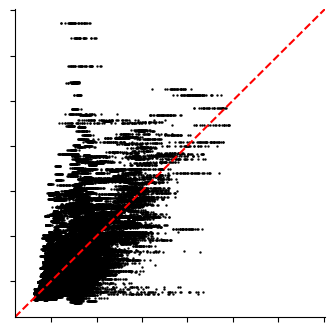

In [85]:
plt.close('all')
plt.style.use('default')

predict_multi_dir = 'output/rf_predictions/multi_date'
predict = pd.read_csv(predict_multi_dir + '/func_test_dB_zonal_25cm_med_mean.csv', index_col=0)


fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(predict['predict'], predict['valid'], s=2, marker='.', color='k')
lims = ax.get_ylim()
ax.set_xlim(ax.get_ylim())
ax.plot((ax.get_xlim()), (ax.get_ylim()), 'r--')
ax.set_ylim(lims)
ax.set_xlim(lims)
ax.tick_params(axis='both', labelleft=False, labelbottom=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_facecolor('#f2f2f2')
# fig.set_facecolor('#f2f2f2')

fig.savefig('poster_test.png', dpi=600, transparent=True)#, facecolor='#f2f2f2')



# 4x3 scatter for non-subgrid results

In [29]:
plt.close('all')
plt.style.use('ggplot')
# fig, ax = plt.subplots(3, 3, figsize=(9*3,9*3))
# fig.suptitle(f'Final UAV summary statistic: {second_stat}', fontsize=24*font_scale, y=0.92)

s1_unit = 'dB'
second_stat = 'mean'
font_scale = 1

metrics_dir = 'output/rf_metrics/single_date'
predict_dir = 'output/rf_predictions/single_date'
metrics_multi_dir = 'output/rf_metrics/multi_date'
predict_multi_dir = 'output/rf_predictions/multi_date'

metrics_0219 = sorted(glob(f'{metrics_dir}/0219/*{s1_unit}*.csv'))
predict_0219 = sorted(glob(f'{predict_dir}/0219/*{s1_unit}*.csv'))
metrics_0302 = sorted(glob(f'{metrics_dir}/0302/*{s1_unit}*csv'))
predict_0302 = sorted(glob(f'{predict_dir}/0302/*{s1_unit}*.csv'))
metrics_multi = sorted(glob(f'{metrics_multi_dir}/*{s1_unit}*.csv'))
predict_multi = sorted(glob(f'{predict_multi_dir}/*{s1_unit}*.csv'))

all_targets = np.unique([x.split('.')[0].split('/')[-1].split('0219_')[-1] for x in metrics_0219])
target_slices = np.unique([re.findall(r'\d{1,2}[cm]{,2}_[a-z0-9]{,5}', t)[0] for t in all_targets if (t.endswith('_mean') or t.endswith('_max') or t.endswith('_min'))])
target_slices = ['moran','scale','shape']
target_dict = {'med':'Median','max':'Maximum','min':'Minimum','range':'Range',
               'p5':'5th percentile','p95':'95th percentile'}

n_rows = len(target_slices)
fig, ax = plt.subplots(n_rows, 3, figsize=(15,5*n_rows))
ax_row = 0
for t in target_slices:
    subset_0219_m = [f for f in metrics_0219 if t in f]
    subset_0302_m = [f for f in metrics_0302 if t in f]
    subset_multi_m = [f for f in metrics_multi if t in f]
    subset_0219_p = [f for f in predict_0219 if t in f]
    subset_0302_p = [f for f in predict_0302 if t in f]
    subset_multi_p = [f for f in predict_multi if t in f]
    
    # n_rows = len(subset_0219_m)
    # fig, ax = plt.subplots(1, 3, figsize=(5*3,5))

    plot_0219_m = pd.read_csv(subset_0219_m[0], index_col=0)
    plot_0219_p = pd.read_csv(subset_0219_p[0], index_col=0)
    plot_0302_m = pd.read_csv(subset_0302_m[0], index_col=0)
    plot_0302_p = pd.read_csv(subset_0302_p[0], index_col=0)
    plot_multi_m = pd.read_csv(subset_multi_m[0], index_col=0)
    plot_multi_p = pd.read_csv(subset_multi_p[0], index_col=0)

    for df in [plot_0219_m, plot_0302_m, plot_multi_m]:
            df.index.name = 'run_no'
        
    for df in [plot_0219_p, plot_0302_p, plot_multi_p]:
        df['run_no'] = df['run_no'].astype(int)
        df.index.name = 'sample'
        df.index = df.index % len(df)//100 # reset sample count for each run
        df.index = pd.MultiIndex.from_arrays([df['run_no'], df.index])
        df.drop(columns='run_no', inplace=True)

    ax[ax_row, 0].scatter(plot_0219_p['predict'], plot_0219_p['valid'], s=2, marker='.', color='k')
    ax[ax_row, 1].scatter(plot_0302_p['predict'], plot_0302_p['valid'], s=2, marker='.', color='k')
    ax[ax_row, 2].scatter(plot_multi_p['predict'], plot_multi_p['valid'], s=2, marker='.', color='k')

    ax[ax_row, 0].set_title(f'Feb. 19:  MAPE = {str(round(plot_0219_m["mape"].mean(), 1))}%  R$^2$ = {str(round(plot_0219_m["r2"].mean(), 2))}', fontsize=16*font_scale)
    ax[ax_row, 1].set_title(f'Mar. 4:  MAPE = {str(round(plot_0302_m["mape"].mean(), 1))}%  R$^2$ = {str(round(plot_0302_m["r2"].mean(), 2))}', fontsize=16*font_scale)
    ax[ax_row, 2].set_title(f'Both:  MAPE = {str(round(plot_multi_m["mape"].mean(), 1))}%  R$^2$ = {str(round(plot_multi_m["r2"].mean(), 2))}', fontsize=16*font_scale)
            
    for j in range(3):
        ax[ax_row, j].set_xlim(ax[ax_row, j].get_ylim())
        ax[ax_row, j].tick_params(axis='both', labelrotation=0, labelsize=16*font_scale)
        # ax[j].set_xlim(ax[j].get_ylim())
        if j == 0:
            ax[ax_row, j].set_ylabel('Measured', fontsize=18*font_scale, labelpad=12)
        if ax_row == n_rows-1:
            ax[ax_row, j].set_xlabel('Predicted', fontsize=18*font_scale, labelpad=12)
        
    # Uncomment below for row-specific x and y lims
    xmin, xmax = ax[ax_row, 0].get_xlim()
    ymin, ymax = ax[ax_row, 0].get_ylim()
    for axx in [ax[ax_row, 1], ax[ax_row, 2]]:
        x0, x1 = axx.get_xlim()
        if x0 < xmin:
            xmin = x0
        if x1 > xmax:
            xmax = x1
        y0, y1 = axx.get_ylim()
        if y0 < ymin:
            ymin = y0
        if y1 > ymax:
            ymax = y1
    
    for axx in ax[ax_row].flatten():
        axx.set_xlim(xmin, xmax)
        axx.set_ylim(ymin, ymax)
        axx.plot((axx.get_xlim()), (axx.get_ylim()), 'r--')
        # for j in range(3):
        #     ax[ax_row, j].set_yticks(ax[ax_row, j].get_xticks())
        # axx.set_xlim(xmin, xmax)
        # axx.set_ylim(ymin, ymax)
    
    ax_row += 1
        
for axx in ax.flatten():
    ylims = axx.get_ylim()
    axx.set_yticks(axx.get_xticks())
    axx.set_ylim(ylims)


  
# plt.suptitle('Regression target: Median roughness (25 cm resolution) // February 19 models only', fontsize=20*font_scale)
fig.tight_layout()
if n_rows == 4:
    plt.subplots_adjust(top=0.95, bottom=0.05, hspace=0.4)
    plt.figtext(0.5, 0.98, 'Regression target: Moran\'s I statistic', ha='center', va='center', fontsize=20*font_scale)
    plt.figtext(0.5, 0.745, 'Regression target: estimated log-normal scale parameter', ha='center', va='center', fontsize=20*font_scale)
    plt.figtext(0.5, 0.5, 'Regression target: estimated log-normal shape parameter', ha='center', va='center', fontsize=20*font_scale)
    plt.figtext(0.5, 0.26, 'Regression target: K-S statistic, log-normal fit', ha='center', va='center', fontsize=20*font_scale)
elif n_rows == 3:
    plt.subplots_adjust(top=0.94, bottom=0.05, hspace=0.4)
    plt.figtext(0.5, 0.985, 'Regression target: Moran\'s $\mathtt{I}$ statistic', ha='center', va='center', fontsize=20*font_scale)
    plt.figtext(0.5, 0.66, 'Regression target: estimated log-normal mean', ha='center', va='center', fontsize=20*font_scale)
    plt.figtext(0.5, 0.33, 'Regression target: estimated log-normal standard deviation', ha='center', va='center', fontsize=20*font_scale)
    
   
fig_fname = f"output/figures/scatter/non_subgrid_targets_3x3.png"
fig.savefig(fig_fname, dpi=300)
plt.close('all')

In [107]:
np.array(axx.get_ylim())*0.9

array([-0.01119326,  0.28053311])

In [63]:
# Rename 0304 25cm files once and for all!

import os

for f in metrics_0302:
    target = f.split('.')[0].split('/')[-1]
    if '_1_' in target:
        pieces = target.split('_1_')
        new_f = f.split('func')[0] +  pieces[0] + '_' + pieces[1]
        # print(new_f)
        os.rename(f, new_f)
        

# Heatmaps of r^2 results

113.0263971943789
113.0263971943789
113.0263971943789


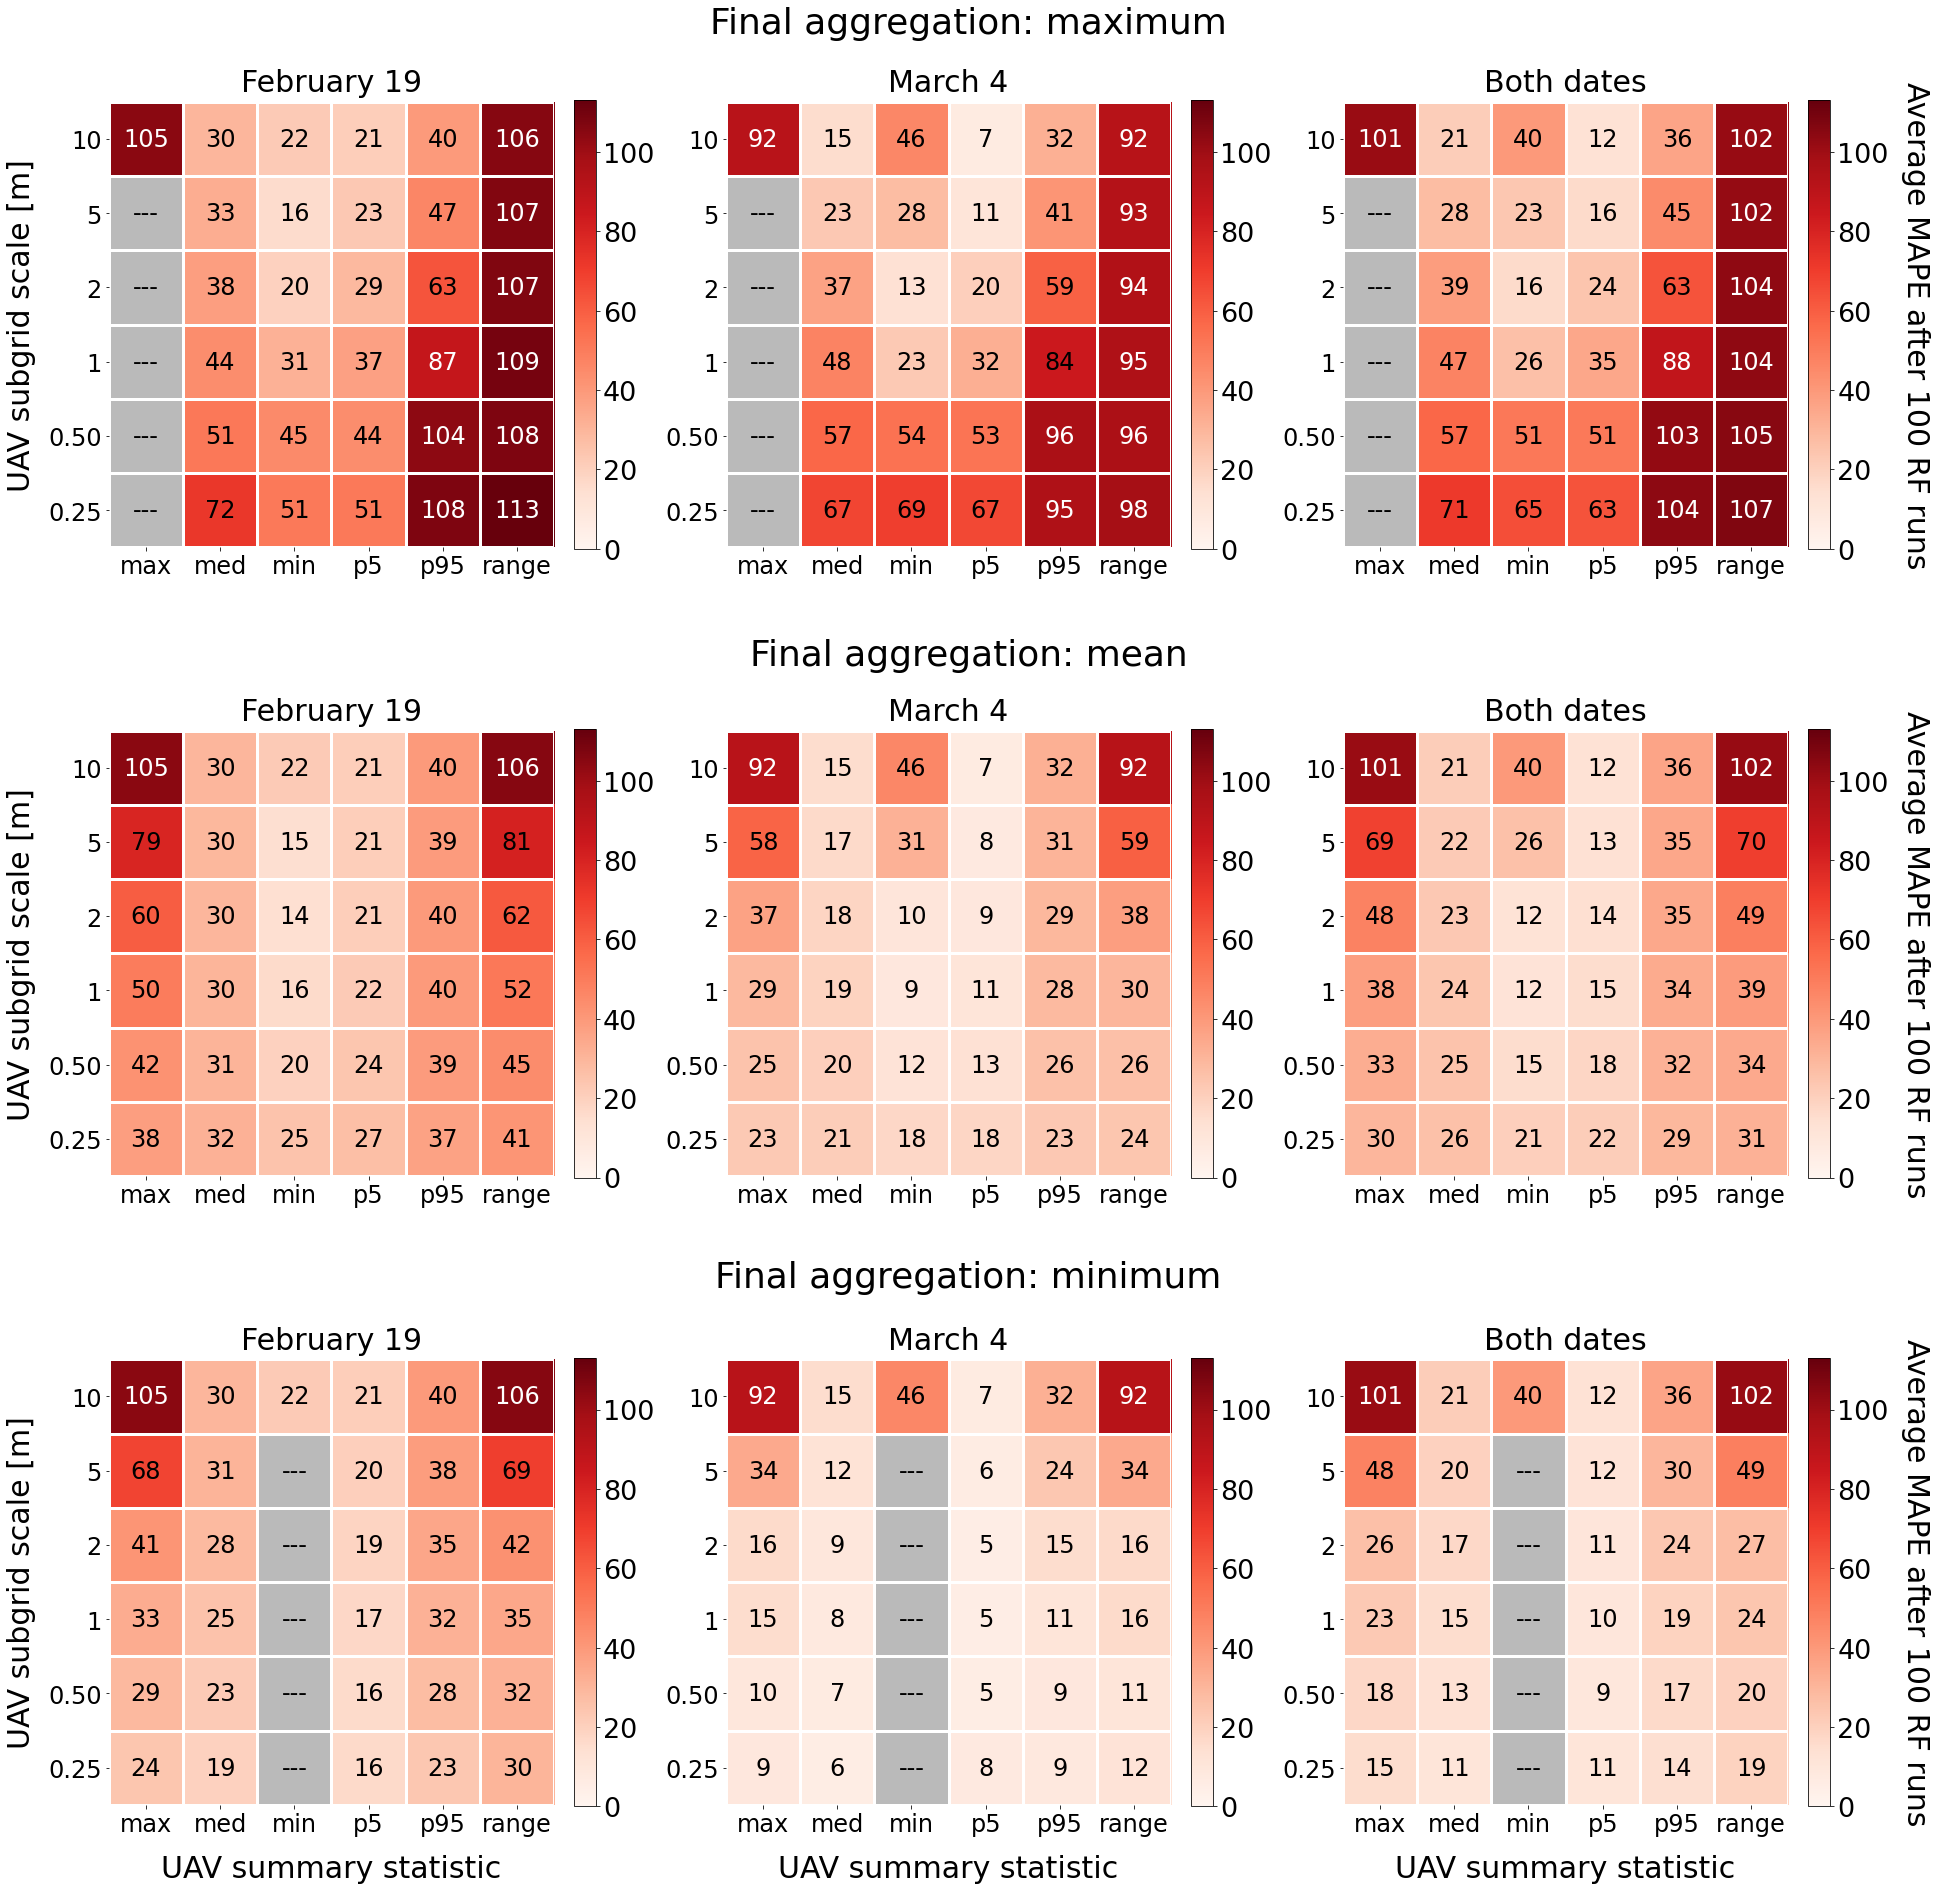

In [18]:
plt.close('all')
fig, ax = plt.subplots(3, 3, figsize=(9*3,9*3))
# fig.suptitle(f'Final UAV summary statistic: {second_stat}', fontsize=24*font_scale, y=0.92)

ax_row = 0
vmax = 20
for sec_stat in ['max', 'mean', 'min']:

    s1_unit = 'dB'
    second_stat = sec_stat
    plot_metric = 'mape'
    font_scale = 1.5

    metrics_dir = 'output/rf_metrics/single_date'
    predict_dir = 'output/rf_predictions/single_date'
    metrics_multi_dir = 'output/rf_metrics/multi_date'
    predict_multi_dir = 'output/rf_predictions/multi_date'

    metrics_0219 = sorted(glob(f'{metrics_dir}/0219/*{s1_unit}*.csv'))
    predict_0219 = sorted(glob(f'{predict_dir}/0219/*{s1_unit}*.csv'))
    metrics_0302 = sorted(glob(f'{metrics_dir}/0302/*{s1_unit}*.csv'))
    predict_0302 = sorted(glob(f'{predict_dir}/0302/*{s1_unit}*.csv'))
    metrics_multi = sorted(glob(f'{metrics_multi_dir}/*{s1_unit}*.csv'))
    predict_multi = sorted(glob(f'{predict_multi_dir}/*{s1_unit}*.csv'))

    zonal_0219 = [f for f in metrics_0219 if 'zonal' in f]
    zonal_0302 = [f for f in metrics_0302 if 'zonal' in f]
    subset_0219 = [f for f in zonal_0219 if second_stat in f.split('.')[0].split('_')[-1]]
    subset_0302 = [f for f in zonal_0302 if second_stat in f.split('.')[0].split('_')[-1]]

    ind = ['10m','5m','2m','1m','50cm','25cm']
    cols = ['max','med','min','p5','p95','range']
    df_0219 = pd.DataFrame(index=ind, columns=cols, dtype=float)
    df_0302 = pd.DataFrame(index=ind, columns=cols, dtype=float)
    df_multi = pd.DataFrame(index=ind, columns=cols, dtype=float)

    # Add in 10m filenames
    files_10m_0219 = [f'{metrics_dir}/0219/func_test_{s1_unit}_zonal_0219_10m_{i}.csv' for i in cols]
    files_10m_0302 = [f'{metrics_dir}/0302/func_test_{s1_unit}_zonal_0304_10m_{i}.csv' for i in cols]
    subset_0219 = files_10m_0219 + subset_0219
    subset_0302 = files_10m_0302 + subset_0302


    def single_to_multi(s):
        parts = s.split(re.findall(r'_\d{4}', s)[0])
        full = parts[0] + parts[1]
        full = full.replace(re.findall(r'/\d{4}', full)[0], '')
        full = full.replace('single', 'multi')
        return full

    subset_multi = [single_to_multi(f) for f in subset_0219]


    for f0219, f0302, fmulti in zip(subset_0219, subset_0302, subset_multi):
        data_0219 = pd.read_csv(f0219, index_col=0, na_values=['inf'])
        data_0302 = pd.read_csv(f0302, index_col=0, na_values=['inf'])
        data_multi = pd.read_csv(fmulti, index_col=0, na_values=['inf'])
        r2_0219 = data_0219[plot_metric].mean()
        r2_0302 = data_0302[plot_metric].mean()
        r2_multi = data_multi[plot_metric].mean()
        scale = re.findall(r'_\d{1,2}[a-z]{1,2}_', f0219)[0].split('_')[1]
        if scale == '10m':
            stat = f0219.split('_')[-1].split('.')[0]
        else:
            stat = f0219.split('_')[-2]
        df_0219.loc[scale, stat] = r2_0219
        df_0302.loc[scale, stat] = r2_0302
        df_multi.loc[scale, stat] = r2_multi
        
    if plot_metric == 'r2':
        cmap = plt.get_cmap('YlGn')#.set_bad('#ff9696')
        vmin = 0
        vmax = 0.65
        cbar_label = 'Average $R^2$ after 100 RF runs'
        round_digits = 2

    else:
        cmap = plt.get_cmap('Reds')#.set_bad('#bababa')
        vmin = 0
        if max([df_0219.max().max(), df_0302.max().max(), df_multi.max().max()]) > vmax:
            vmax = max([df_0219.max().max(), df_0302.max().max(), df_multi.max().max()])
        cbar_label = f'Average {plot_metric.upper()} after 100 RF runs'
        round_digits = 0
        print(vmax)




    dfs = [df_0219, df_0302, df_multi]
    # titles = ['Feb 18 S1 data/Feb 19 UAV data', 'Mar 2 S1 data/Mar 4 UAV data', 'Combined dates']
    titles = ['February 19', 'March 4', 'Both dates']
    # fig, ax = plt.subplots(1, len(dfs), figsize=(9*len(dfs),10))
    # fig.suptitle(f'Final UAV summary statistic: {second_stat}', fontsize=24*font_scale, y=0.92)

    j = 0
    for df in dfs:
        im = ax[ax_row, j].imshow(df, cmap=cmap, vmin=vmin, vmax=vmax)
        ax[ax_row, j].set_xticks(np.arange(df.shape[1]+1)-.5, minor=True)
        ax[ax_row, j].set_yticks(np.arange(df.shape[0]+1)-.5, minor=True)
        ax[ax_row, j].grid(which="minor", color="w", linestyle='-', linewidth=3)
        ax[ax_row, j].tick_params(axis='both', which='minor', bottom=False, left=False)
        ax[ax_row, j].set_xticks(ax[ax_row, j].get_xticks()[1:-1])
        ax[ax_row, j].set_yticks(ax[ax_row, j].get_yticks()[1:-1])
        ax[ax_row, j].set_xticklabels(cols, fontsize=16*font_scale)
        ax[ax_row, j].set_yticklabels(['10','5','2','1','0.50','0.25'], fontsize=16*font_scale)
        cbar_ratio = df.shape[0]/df.shape[1]
        cbar = plt.colorbar(im, ax=ax[ax_row, j], fraction=0.046*cbar_ratio, pad=0.04)
        cbar.ax.tick_params(labelsize=18*font_scale)
        if j == len(dfs)-1:
            cbar.ax.set_ylabel(cbar_label, rotation=-90, 
                            va='bottom', fontsize=20*font_scale, labelpad=12)
            

        for i in range(len(ind)):
            for k in range(len(cols)):
                if df.iloc[i, k]/vmax >= 0.75:
                    textcolor = 'white'
                else:
                    textcolor = 'black'
                if not pd.isnull(df.iloc[i, k]):
                    if round_digits != 0:
                        text = ax[ax_row, j].text(k, i, df.iloc[i, k].round(round_digits), fontsize=16*font_scale,
                                    ha='center', va='center', color=textcolor)
                    else:
                        text = ax[ax_row, j].text(k, i, int(df.iloc[i, k].round(round_digits)), fontsize=16*font_scale,
                                    ha='center', va='center', color=textcolor)
                else:
                    text = ax[ax_row, j].text(k, i, '---', fontsize=16*font_scale,
                                ha='center', va='center', color=textcolor)

        ax[ax_row, j].spines['bottom'].set_visible(False)
        ax[ax_row, j].spines['top'].set_visible(False)
        ax[ax_row, j].spines['left'].set_visible(False)
        ax[ax_row, j].spines['right'].set_visible(False)
        if ax_row == 2:
            ax[ax_row, j].set_xlabel('UAV summary statistic', fontsize=20*font_scale, labelpad=18)
        if j == 0:
            ax[ax_row, j].set_ylabel('UAV subgrid scale [m]', fontsize=20*font_scale, labelpad=12)


        ax[ax_row, j].set_title(titles[j], fontsize=20*font_scale, y=1.01)
        j += 1

    ax_row += 1        

plt.figtext(0.5, 0.99, 'Final aggregation: maximum', ha='center', va='center', fontsize=24*font_scale)
plt.figtext(0.5, 0.665, 'Final aggregation: mean', ha='center', va='center', fontsize=24*font_scale)
plt.figtext(0.5, 0.345, 'Final aggregation: minimum', ha='center', va='center', fontsize=24*font_scale)

plt.tight_layout()


# fig.savefig(f'output/figures/heatmap/{plot_metric}/{plot_metric}_full_comparison_{second_stat}_{s1_unit}.pdf', dpi=600)
fig.savefig(f'output/figures/heatmap/{plot_metric}/{plot_metric}_full_comparison_{s1_unit}.pdf', dpi=600)        


# MAPE heatmap - poster

In [158]:
plt.close('all')
fig, ax = plt.subplots(3, 3, figsize=(9*3,10.8*3))
# fig.suptitle(f'Final UAV summary statistic: {second_stat}', fontsize=24*font_scale, y=0.92)

ax_row = 0
for sec_stat in ['max', 'mean', 'min']:

    s1_unit = 'dB'
    second_stat = sec_stat
    plot_metric = 'mape'
    font_scale = 1.5

    metrics_dir = 'output/rf_metrics/single_date'
    predict_dir = 'output/rf_predictions/single_date'
    metrics_multi_dir = 'output/rf_metrics/multi_date'
    predict_multi_dir = 'output/rf_predictions/multi_date'

    metrics_0219 = sorted(glob(f'{metrics_dir}/0219/*{s1_unit}*.csv'))
    predict_0219 = sorted(glob(f'{predict_dir}/0219/*{s1_unit}*.csv'))
    metrics_0302 = sorted(glob(f'{metrics_dir}/0302/*{s1_unit}*.csv'))
    predict_0302 = sorted(glob(f'{predict_dir}/0302/*{s1_unit}*.csv'))
    metrics_multi = sorted(glob(f'{metrics_multi_dir}/*{s1_unit}*.csv'))
    predict_multi = sorted(glob(f'{predict_multi_dir}/*{s1_unit}*.csv'))

    zonal_0219 = [f for f in metrics_0219 if 'zonal' in f]
    zonal_0302 = [f for f in metrics_0302 if 'zonal' in f]
    subset_0219 = [f for f in zonal_0219 if second_stat in f.split('.')[0].split('_')[-1]]
    subset_0302 = [f for f in zonal_0302 if second_stat in f.split('.')[0].split('_')[-1]]

    ind = ['10m','5m','2m','1m','50cm','25cm']
    cols = ['max','med','min','p5','p95','range']
    df_0219 = pd.DataFrame(index=ind, columns=cols, dtype=float)
    df_0302 = pd.DataFrame(index=ind, columns=cols, dtype=float)
    df_multi = pd.DataFrame(index=ind, columns=cols, dtype=float)

    # Add in 10m filenames
    files_10m_0219 = [f'{metrics_dir}/0219/func_test_{s1_unit}_zonal_0219_10m_{i}.csv' for i in cols]
    files_10m_0302 = [f'{metrics_dir}/0302/func_test_{s1_unit}_zonal_0304_10m_{i}.csv' for i in cols]
    subset_0219 = files_10m_0219 + subset_0219
    subset_0302 = files_10m_0302 + subset_0302


    def single_to_multi(s):
        parts = s.split(re.findall(r'_\d{4}', s)[0])
        full = parts[0] + parts[1]
        full = full.replace(re.findall(r'/\d{4}', full)[0], '')
        full = full.replace('single', 'multi')
        return full

    subset_multi = [single_to_multi(f) for f in subset_0219]


    for f0219, f0302, fmulti in zip(subset_0219, subset_0302, subset_multi):
        data_0219 = pd.read_csv(f0219, index_col=0, na_values=['inf'])
        data_0302 = pd.read_csv(f0302, index_col=0, na_values=['inf'])
        data_multi = pd.read_csv(fmulti, index_col=0, na_values=['inf'])
        r2_0219 = data_0219[plot_metric].mean()
        r2_0302 = data_0302[plot_metric].mean()
        r2_multi = data_multi[plot_metric].mean()
        scale = re.findall(r'_\d{1,2}[a-z]{1,2}_', f0219)[0].split('_')[1]
        if scale == '10m':
            stat = f0219.split('_')[-1].split('.')[0]
        else:
            stat = f0219.split('_')[-2]
        df_0219.loc[scale, stat] = r2_0219
        df_0302.loc[scale, stat] = r2_0302
        df_multi.loc[scale, stat] = r2_multi
        
    if plot_metric == 'r2':
        cmap = plt.get_cmap('YlGn')#.set_bad('#ff9696')
        vmin = 0
        vmax = 0.65
        cbar_label = 'Average $R^2$ after 100 RF runs'
        round_digits = 2

    else:
        cmap = plt.get_cmap('Reds')#.set_bad('#bababa')
        vmin = 0
        vmax = max([df_0219.max().max(), df_0302.max().max(), df_multi.max().max()])
        cbar_label = f'Average {plot_metric.upper()} (100 RF runs)'
        round_digits = 0




    dfs = [df_0219, df_0302, df_multi]
    # titles = ['Feb 18 S1 data/Feb 19 UAV data', 'Mar 2 S1 data/Mar 4 UAV data', 'Combined dates']
    titles = ['February 19', 'March 4', 'Both dates']
    # fig, ax = plt.subplots(1, len(dfs), figsize=(9*len(dfs),10))
    # fig.suptitle(f'Final UAV summary statistic: {second_stat}', fontsize=24*font_scale, y=0.92)

    j = 0
    for df in dfs:
        im = ax[ax_row, j].imshow(df, cmap=cmap, vmin=vmin, vmax=vmax)
        ax[ax_row, j].set_xticks(np.arange(df.shape[1]+1)-.5, minor=True)
        ax[ax_row, j].set_yticks(np.arange(df.shape[0]+1)-.5, minor=True)
        ax[ax_row, j].grid(which="minor", color="w", linestyle='-', linewidth=3)
        ax[ax_row, j].tick_params(axis='both', which='minor', bottom=False, left=False)
        ax[ax_row, j].set_xticks(ax[ax_row, j].get_xticks()[1:-1])
        ax[ax_row, j].set_yticks(ax[ax_row, j].get_yticks()[1:-1])
        ax[ax_row, j].set_xticklabels(cols, fontsize=16*font_scale)
        ax[ax_row, j].set_yticklabels(ind, fontsize=16*font_scale)
        if j == 2:
            cbar_ratio = df.shape[0]/df.shape[1]
            cbar = plt.colorbar(im, ax=ax[ax_row, j], fraction=0.046*cbar_ratio, pad=0.04)
            cbar.ax.tick_params(labelsize=18*font_scale)
            if j == len(dfs)-1:
                cbar.ax.set_ylabel(cbar_label, rotation=-90, 
                                va='bottom', fontsize=20*font_scale, labelpad=12)
            

        for i in range(len(ind)):
            for k in range(len(cols)):
                if df.iloc[i, k]/vmax >= 0.75:
                    textcolor = 'white'
                else:
                    textcolor = 'black'
                if not pd.isnull(df.iloc[i, k]):
                    if round_digits != 0:
                        text = ax[ax_row, j].text(k, i, df.iloc[i, k].round(round_digits), fontsize=16*font_scale,
                                    ha='center', va='center', color=textcolor)
                    else:
                        text = ax[ax_row, j].text(k, i, int(df.iloc[i, k].round(round_digits)), fontsize=16*font_scale,
                                    ha='center', va='center', color=textcolor)
                else:
                    text = ax[ax_row, j].text(k, i, '---', fontsize=16*font_scale,
                                ha='center', va='center', color=textcolor)

        ax[ax_row, j].spines['bottom'].set_visible(False)
        ax[ax_row, j].spines['top'].set_visible(False)
        ax[ax_row, j].spines['left'].set_visible(False)
        ax[ax_row, j].spines['right'].set_visible(False)
        if ax_row == 2:
            ax[ax_row, j].set_xlabel('UAV summary statistic', fontsize=20*font_scale, labelpad=18)
        if j == 0:
            ax[ax_row, j].set_ylabel('UAV subgrid scale', fontsize=20*font_scale, labelpad=12)


        ax[ax_row, j].set_title(titles[j], fontsize=20*font_scale, y=1.01)
        j += 1

    ax_row += 1        

plt.tight_layout()
plt.subplots_adjust(top=0.93, bottom=0.09, hspace=0.4)

plt.figtext(0.5, 0.97, 'Final aggregation: maximum', ha='center', va='center', fontsize=26*font_scale)
plt.figtext(0.5, 0.655, 'Final aggregation: mean', ha='center', va='center', fontsize=26*font_scale)
plt.figtext(0.5, 0.35, 'Final aggregation: minimum', ha='center', va='center', fontsize=26*font_scale)

fig.savefig(f'output/figures/heatmap/{plot_metric}/{plot_metric}_full_comparison_poster_colorbar.png', dpi=600, transparent=True)
plt.close('all')

# Distributions of all roughness measurements

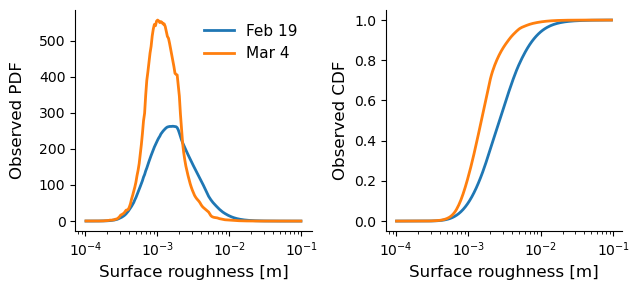

In [31]:
# The loop below takes ~4 mins to run
plt.style.use('default')
dir_0218 = 'input_data/s1_pixels/0218/'
dir_0302 = 'input_data/s1_pixels/0302/'

first_loop = True
bins = np.logspace(-4, -1, 200)

i = 0
for d in [dir_0218, dir_0302]:
    for f in sorted(glob(f'{d}*.csv')):
        data = pd.read_csv(f, index_col=0, na_values=[0])
        data.dropna(inplace=True)
        data.reset_index(inplace=True)
        binned = pd.cut(data['std_dev'], bins=bins, precision=6)
        counts = binned.value_counts().sort_index()
        
        if first_loop:
            counts_0218 = pd.Series(np.zeros(len(counts)),
                                    index=counts.index, dtype=int)
            counts_0302 = pd.Series(np.zeros(len(counts)),
                                    index=counts.index, dtype=int)
            
            first_loop = False
        
        if i == 0:
            counts_0218 += counts
        else:
            counts_0302 += counts   
        
    i += 1


fig, ax = plt.subplots(1, 2, figsize=(6.5,3))
bins_center = (bins[1:] + bins[:-1])/2
ax[0].plot(bins_center, counts_0218/counts_0218.sum()/np.diff(bins), lw=2, label='Feb 19')
ax[0].plot(bins_center, counts_0302/counts_0302.sum()/np.diff(bins), lw=2, label='Mar 4')
# ax[0].set_ylim(-27,600)
ax[0].set_xscale('log')
ax[0].legend(frameon=False, fontsize=11)
ax[0].set_ylabel('Observed PDF', fontsize=12, labelpad=10)
ax[0].set_xlabel('Surface roughness [m]', fontsize=12)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ct_0218 = cumulative_trapezoid(counts_0218/counts_0218.sum()/np.diff(bins), x=bins_center)
ct_0302 = cumulative_trapezoid(counts_0302/counts_0302.sum()/np.diff(bins), x=bins_center)
ax[1].plot(bins_center[:-1], ct_0218, lw=2)
ax[1].plot(bins_center[:-1], ct_0302, lw=2)
ax[1].set_xscale('log')
# ax[1].legend()
ax[1].set_ylabel('Observed CDF', fontsize=12)
ax[1].set_xlabel('Surface roughness scale', fontsize=12)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.tight_layout()
# fig.savefig('output/figures/distributions/est_densities.pdf', dpi=600)


        



In [38]:
ax[0].set_xticklabels(['', '', '', 'mm', 'cm', '', '', ''])
ax[1].set_xticklabels(['', '', '', 'mm', 'cm', '', '', ''])
ax[0].set_xlabel('Surface roughness scale', fontsize=12)
ax[1].set_xlabel('Surface roughness scale', fontsize=12)

fig.savefig('output/figures/distributions/est_densities_newlabels.pdf', dpi=600)

<ipython-input-38-3bd3b00e05f8>:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(['', '', '', 'mm', 'cm', '', '', ''])
<ipython-input-38-3bd3b00e05f8>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(['', '', '', 'mm', 'cm', '', '', ''])


# Distributions of rough/smooth pixels used for classification

<ipython-input-41-89c8878049d0>:100: UserWarning: FixedFormatter should only be used together with FixedLocator
  axx.set_xticklabels(['','','','mm','cm','','',''])


Text(0.5, 0.485, 'March 4 class samples')

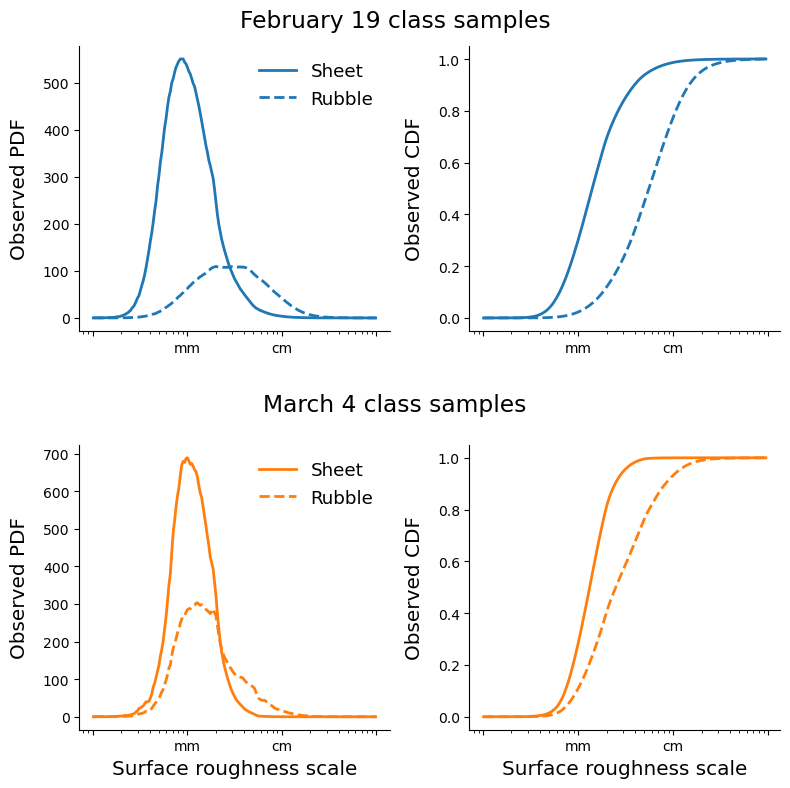

In [41]:
# Resuses the loop code from the first distribution plot above
# Takes ~ 20 seconds to run

pixels = pd.read_csv('output/stats/classification_samples.csv')
pixels['date'] = pixels['date'].astype(str).str.zfill(4)
pixels.rename(columns={'S1_pixel_ID':'orig_S1_pixel_ID'}, inplace=True)
pixels_0218 = pixels[pixels['date']=='0218']
pixels_0302 = pixels[pixels['date']=='0302']
# Need to convert 'original' S1 ID to normal one used throughout project
pixel_ids_0218 = pd.read_csv('input_data/s1_0218_double_ID.csv')[['S1_pixel_ID','orig_S1_pixel_ID']]
pixel_ids_0302 = pd.read_csv('input_data/s1_0302_double_ID.csv')[['S1_pixel_ID','orig_S1_pixel_ID']]
pixels_0218 = pixels_0218.merge(pixel_ids_0218, on='orig_S1_pixel_ID')
pixels_0302 = pixels_0302.merge(pixel_ids_0302, on='orig_S1_pixel_ID')
# Now use the S1_pixel_ID column as normal for indexing
pixels_0218.index = pd.MultiIndex.from_arrays([pixels_0218['date'], pixels_0218['S1_pixel_ID']])
pixels_0302.index = pd.MultiIndex.from_arrays([pixels_0302['date'], pixels_0302['S1_pixel_ID']])
pixels_0218.drop(columns=['date','S1_pixel_ID','orig_S1_pixel_ID'], inplace=True)
pixels_0302.drop(columns=['date','S1_pixel_ID','orig_S1_pixel_ID'], inplace=True)

# Separate smooth and rough
pixels_r0218 = pixels_0218[pixels_0218['class']=='rough']
pixels_s0218 = pixels_0218[pixels_0218['class']=='smooth']
pixels_r0302 = pixels_0302[pixels_0302['class']=='rough']
pixels_s0302 = pixels_0302[pixels_0302['class']=='smooth']

first_loop = True
bins = np.logspace(-4, -1, 200)

i = 0
for df in [pixels_r0218, pixels_s0218, pixels_r0302, pixels_s0302]:
    for ind in df.index:
        date = '0218' if i < 2 else '0302'
        f = f'input_data/s1_pixels/{date}/s1_{ind[-1]}.csv'
        data = pd.read_csv(f, index_col=0, na_values=[0])
        data.dropna(inplace=True)
        data.reset_index(inplace=True)
        binned = pd.cut(data['std_dev'], bins=bins, precision=6)
        counts = binned.value_counts().sort_index()
        
        if first_loop:
            rough_0218 = pd.Series(np.zeros(len(counts)),
                                    index=counts.index, dtype=int)
            smooth_0218 = pd.Series(np.zeros(len(counts)),
                                    index=counts.index, dtype=int)
            
            rough_0302 = pd.Series(np.zeros(len(counts)),
                                    index=counts.index, dtype=int)
            smooth_0302 = pd.Series(np.zeros(len(counts)),
                                    index=counts.index, dtype=int)
            first_loop = False
        
        if i == 0:
            rough_0218 += counts
        elif i == 1:
            smooth_0218 += counts
        elif i == 2:
            rough_0302 += counts
        elif i == 3:
            smooth_0302 += counts
        
        
    i += 1


# Figure 
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
font_scale = 1.2
# fig, ax = plt.subplots(2, 2, figsize=(6.5,6.5)) # paper size
fig, ax = plt.subplots(2, 2, figsize=(8,8)) # poster size

bins_center = (bins[1:] + bins[:-1])/2
ax[0,0].plot(bins_center, smooth_0218/smooth_0218.sum()/np.diff(bins), color=cycle[0], lw=2, label='Sheet')
ax[0,0].plot(bins_center, rough_0218/rough_0218.sum()/np.diff(bins), color=cycle[0], ls='--', lw=2, label='Rubble')
ax[0,0].set_ylabel('Observed PDF', fontsize=12*font_scale, labelpad=10)
ax[0,0].legend(frameon=False, fontsize=11*font_scale)
#ax[0,0].set_title('February 19 samples')#, x=1.5)

ct_0218_s = cumulative_trapezoid(smooth_0218/smooth_0218.sum()/np.diff(bins), x=bins_center)
ct_0218_r = cumulative_trapezoid(rough_0218/rough_0218.sum()/np.diff(bins), x=bins_center)
ax[0,1].plot(bins_center[:-1], ct_0218_s, color=cycle[0], lw=2, label='Sheet')
ax[0,1].plot(bins_center[:-1], ct_0218_r, color=cycle[0], ls='--', lw=2, label='Rubble')
ax[0,1].set_ylabel('Observed CDF', fontsize=12*font_scale, labelpad=10)


ax[1,0].plot(bins_center, smooth_0302/smooth_0302.sum()/np.diff(bins), color=cycle[1], lw=2, label='Sheet')
ax[1,0].plot(bins_center, rough_0302/rough_0302.sum()/np.diff(bins), color=cycle[1], ls='--', lw=2, label='Rubble')
ax[1,0].set_ylabel('Observed PDF', fontsize=12*font_scale, labelpad=10)
ax[1,0].set_xlabel('Surface roughness scale', fontsize=12*font_scale)
ax[1,0].legend(frameon=False, fontsize=11*font_scale)

ct_0302_s = cumulative_trapezoid(smooth_0302/smooth_0302.sum()/np.diff(bins), x=bins_center)
ct_0302_r = cumulative_trapezoid(rough_0302/rough_0302.sum()/np.diff(bins), x=bins_center)
ax[1,1].plot(bins_center[:-1], ct_0302_s, color=cycle[1], lw=2, label='Sheet')
ax[1,1].plot(bins_center[:-1], ct_0302_r, color=cycle[1], ls='--', lw=2, label='Rubble')
ax[1,1].set_ylabel('Observed CDF', fontsize=12*font_scale, labelpad=10)
ax[1,1].set_xlabel('Surface roughness scale', fontsize=12*font_scale)

for axx in ax.flatten():
    axx.set_xscale('log')
    axx.set_xticklabels(['','','','mm','cm','','',''])
    # axx.legend(frameon=False, fontsize=11)
    axx.spines['top'].set_visible(False)
    axx.spines['right'].set_visible(False)

plt.suptitle('February 19 class samples', fontsize=14*font_scale)
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.figtext(0.5, 0.485, 'March 4 class samples', ha='center', va='center', fontsize=14*font_scale)

# fig.savefig('output/figures/distributions/class_densities.png', dpi=600, transparent=True)


In [42]:
fig.savefig('output/figures/distributions/class_densities_newlabels.pdf', dpi=600, transparent=True)

# Distributions of rough/smooth pixels used for classification - poster

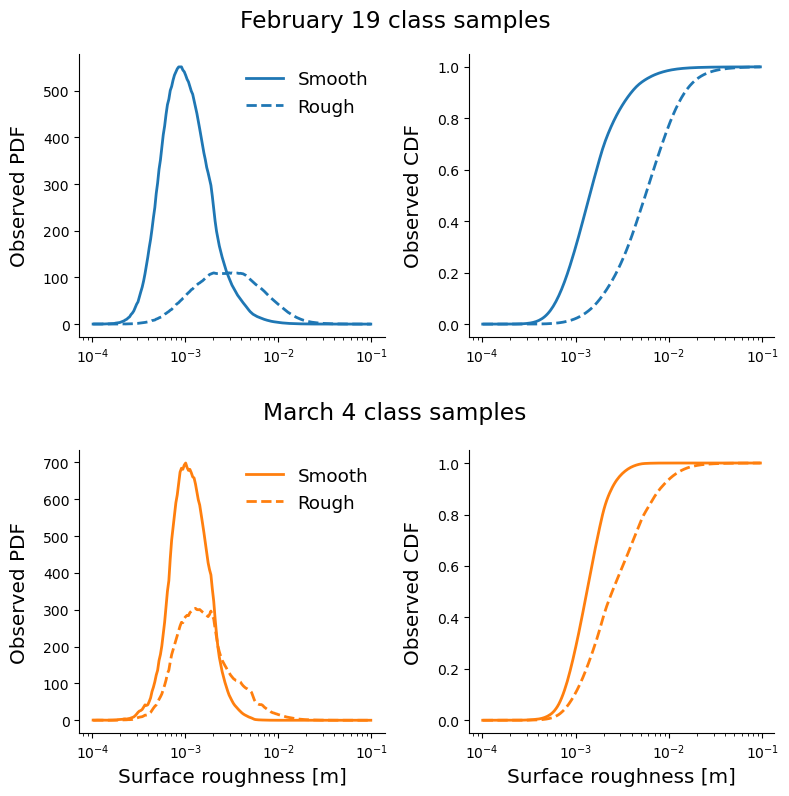

In [94]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
font_scale = 1.2
# fig, ax = plt.subplots(2, 2, figsize=(6.5,6.5)) # paper size
fig, ax = plt.subplots(2, 2, figsize=(8,8)) # poster size

bins_center = (bins[1:] + bins[:-1])/2
ax[0,0].plot(bins_center, smooth_0218/smooth_0218.sum()/np.diff(bins), color=cycle[0], lw=2, label='Smooth')
ax[0,0].plot(bins_center, rough_0218/rough_0218.sum()/np.diff(bins), color=cycle[0], ls='--', lw=2, label='Rough')
ax[0,0].set_ylabel('Observed PDF', fontsize=12*font_scale, labelpad=10)
ax[0,0].legend(frameon=False, fontsize=11*font_scale)
#ax[0,0].set_title('February 19 samples')#, x=1.5)

ct_0218_s = cumulative_trapezoid(smooth_0218/smooth_0218.sum()/np.diff(bins), x=bins_center)
ct_0218_r = cumulative_trapezoid(rough_0218/rough_0218.sum()/np.diff(bins), x=bins_center)
ax[0,1].plot(bins_center[:-1], ct_0218_s, color=cycle[0], lw=2, label='Smooth')
ax[0,1].plot(bins_center[:-1], ct_0218_r, color=cycle[0], ls='--', lw=2, label='Rough')
ax[0,1].set_ylabel('Observed CDF', fontsize=12*font_scale, labelpad=10)


ax[1,0].plot(bins_center, smooth_0302/smooth_0302.sum()/np.diff(bins), color=cycle[1], lw=2, label='Smooth')
ax[1,0].plot(bins_center, rough_0302/rough_0302.sum()/np.diff(bins), color=cycle[1], ls='--', lw=2, label='Rough')
ax[1,0].set_ylabel('Observed PDF', fontsize=12*font_scale, labelpad=10)
ax[1,0].set_xlabel('Surface roughness [m]', fontsize=12*font_scale)
ax[1,0].legend(frameon=False, fontsize=11*font_scale)

ct_0302_s = cumulative_trapezoid(smooth_0302/smooth_0302.sum()/np.diff(bins), x=bins_center)
ct_0302_r = cumulative_trapezoid(rough_0302/rough_0302.sum()/np.diff(bins), x=bins_center)
ax[1,1].plot(bins_center[:-1], ct_0302_s, color=cycle[1], lw=2, label='Smooth')
ax[1,1].plot(bins_center[:-1], ct_0302_r, color=cycle[1], ls='--', lw=2, label='Rough')
ax[1,1].set_ylabel('Observed CDF', fontsize=12*font_scale, labelpad=10)
ax[1,1].set_xlabel('Surface roughness [m]', fontsize=12*font_scale)

for axx in ax.flatten():
    axx.set_xscale('log')
    # axx.legend(frameon=False, fontsize=11)
    axx.spines['top'].set_visible(False)
    axx.spines['right'].set_visible(False)

plt.suptitle('February 19 class samples', fontsize=14*font_scale, y=0.99)
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.figtext(0.5, 0.485, 'March 4 class samples', ha='center', va='center', fontsize=14*font_scale)

fig.savefig('output/figures/distributions/class_densities_poster.png', dpi=600, transparent=True)